# ECG - Electrocardiography (ECG or EKG)
- Name: Shreya Nair
- email: shreyanair.1697@gmail.com

## Import Libraries

In [1]:
import os 
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#Imbalanced Class
from imblearn.over_sampling import SMOTE

#Computer Vision 
import cv2

# Scikit Learn - Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Deep Learning
import tensorflow as tf
tf.keras.backend.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG19
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
import shap

2024-05-23 23:48:27.816953: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/shreyanair/.pyenv/versions/3.10.12/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Dataset

In [2]:
dataset_path = "ECG_COVID_19"
num_abnormal_heartbeat = len(os.listdir(os.path.join(dataset_path, 'Abnormal heart beats')))
num_normal_heartbeat = len(os.listdir(os.path.join(dataset_path, 'Normal')))
num_COVID_19 = len(os.listdir(os.path.join(dataset_path, 'COVID-19 Patients ')))
num_Mycocardial_Infarctions = len(os.listdir(os.path.join(dataset_path, 'Myocardial Infarction Patients ')))
num_MI_History = len(os.listdir(os.path.join(dataset_path,'MI_History')))

In [3]:
print ("Number of abnormal heart beats images:", num_abnormal_heartbeat)
print ("Number of normal heart beats images:", num_normal_heartbeat)
print ("Number of COVID-19 Patients images:", num_COVID_19)
print ("Number of Myocardial Infarction Patients images:", num_Mycocardial_Infarctions)
print ("Number of MI_History Patients images:", num_MI_History)

Number of abnormal heart beats images: 546
Number of normal heart beats images: 859
Number of COVID-19 Patients images: 250
Number of Myocardial Infarction Patients images: 74
Number of MI_History Patients images: 203


## Exploratory Data Analysis

In [4]:
labels = ['Abnormal Heart Beat', 'COVID-19', 'Previous MI History', 'Myocardial Infarction', 'Normal']
counts = [num_abnormal_heartbeat, num_COVID_19, num_MI_History, num_Mycocardial_Infarctions, num_normal_heartbeat]

fig = go.Figure(data=[go.Bar(x=labels, y=counts)])

fig.update_layout(
    title='Distribution of Images in Different Categories',
    xaxis=dict(title='Image Type'),
    yaxis=dict(title='Count'),
    width=800,
    height=500
)

fig.show()

In [5]:
fig = go.Figure(data=[go.Pie(labels=labels, values=counts, textinfo='percent', hole=0.3)])

fig.update_layout(
    title='Distribution of Images in Different Categories',
    width=800,
    height=600
)

fig.show()

In [6]:
# Dataset Paths
abnormalheartbeat_path = os.path.join(dataset_path, 'Abnormal heart beats')
normalheartbeat_path = os.path.join(dataset_path, 'Normal')
COVID_19_path = os.path.join(dataset_path, 'COVID-19 Patients ')
Mycocardial_Infarctions_path = os.path.join(dataset_path, 'Myocardial Infarction Patients ')
MI_History_path = os.path.join(dataset_path,'MI_History')

In [7]:
abnornal_files = os.listdir(abnormalheartbeat_path)
normal_files = os.listdir(normalheartbeat_path)
COVID_19_files = os.listdir(COVID_19_path)
Mycocardial_Infarctions_files = os.listdir(Mycocardial_Infarctions_path)
MI_History_files = os.listdir(MI_History_path)

## Visualization

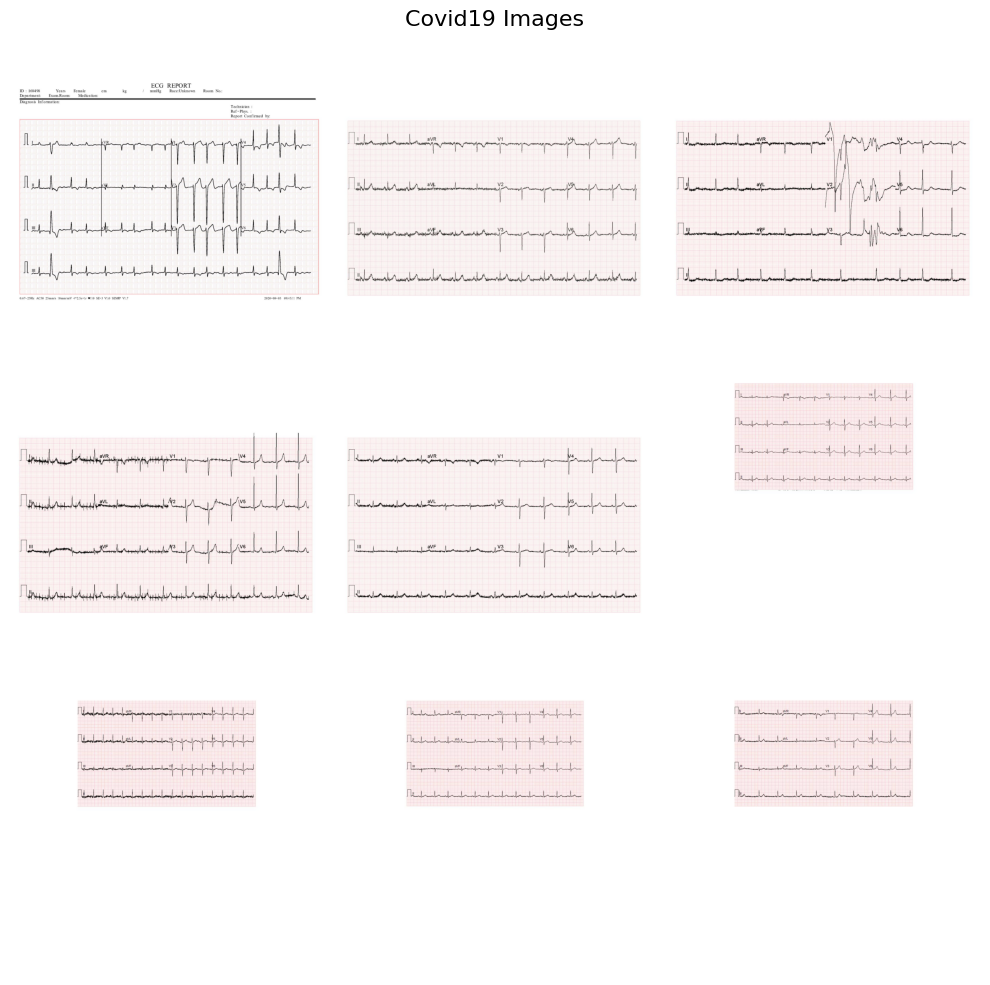

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Covid19 Images', fontsize=16)
axes = axes.ravel()

for i, image_file in enumerate(COVID_19_files[:9]):
    image_path = os.path.join(COVID_19_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

This code snippet initializes a 3x3 grid of subplots within a 10x10-inch figure, with a main title indicating "Covid19 Images". It iterates over the first 9 filenames of images presumed to depict COVID-19 patients, loading each image using OpenCV, converting its color format to RGB, and displaying it on the corresponding subplot. The axis labels and ticks are turned off for each subplot to maintain clarity. Finally, the subplots are adjusted for a tight layout to prevent overlap, and the complete figure showcasing the COVID-19 images is displayed using Matplotlib.

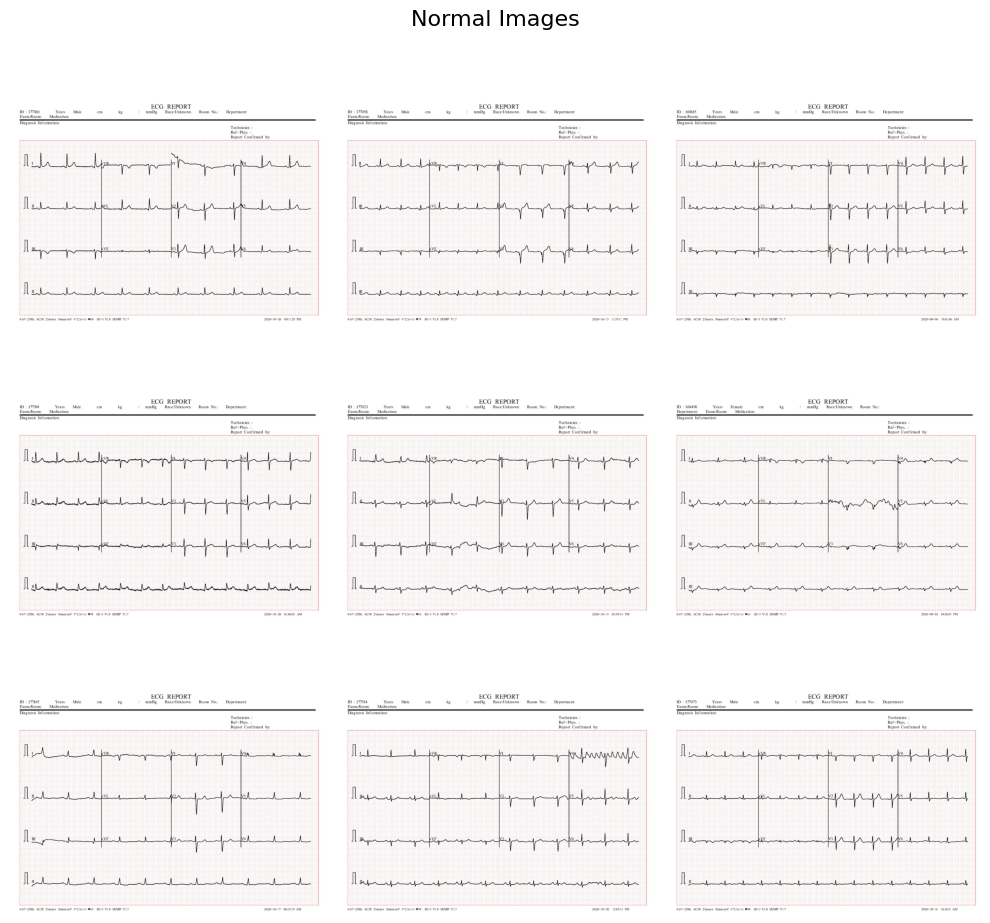

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Normal Images', fontsize=16)
axes = axes.ravel()

for i, image_file in enumerate(normal_files[:9]):
    image_path = os.path.join(normalheartbeat_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

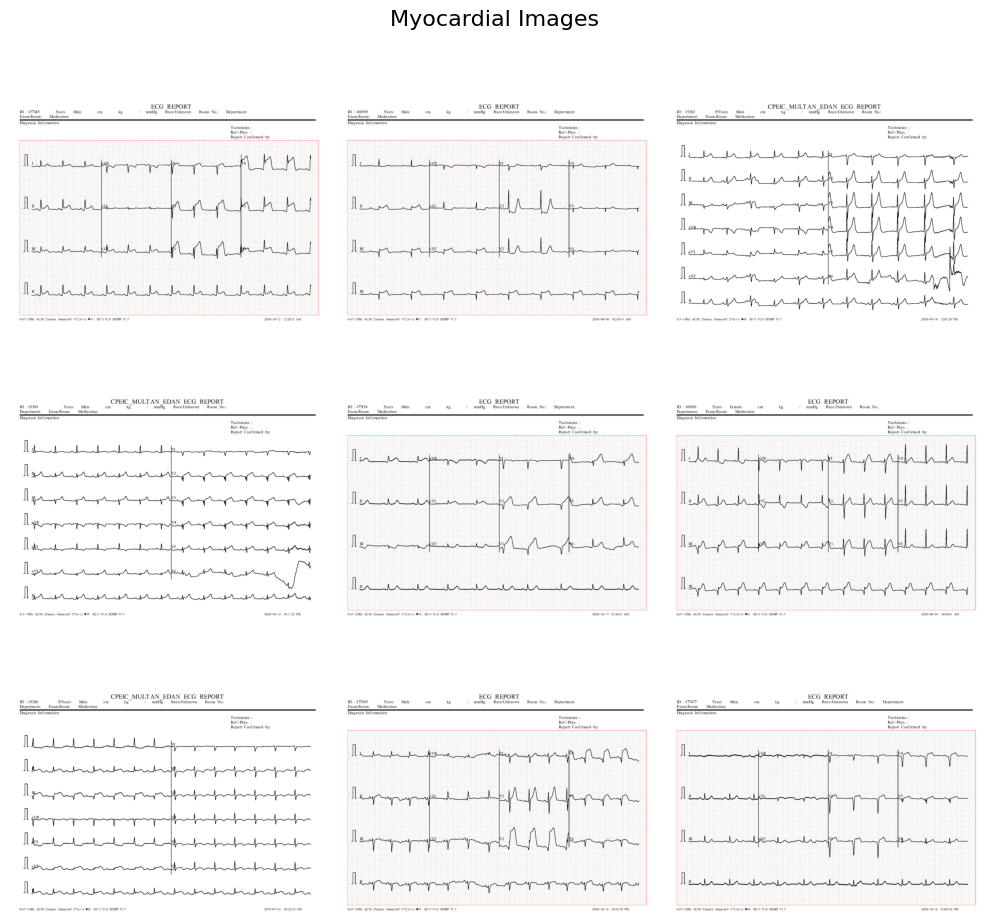

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Myocardial Images', fontsize=16)
axes = axes.ravel()

for i, image_file in enumerate(Mycocardial_Infarctions_files[:9]):
    image_path = os.path.join(Mycocardial_Infarctions_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

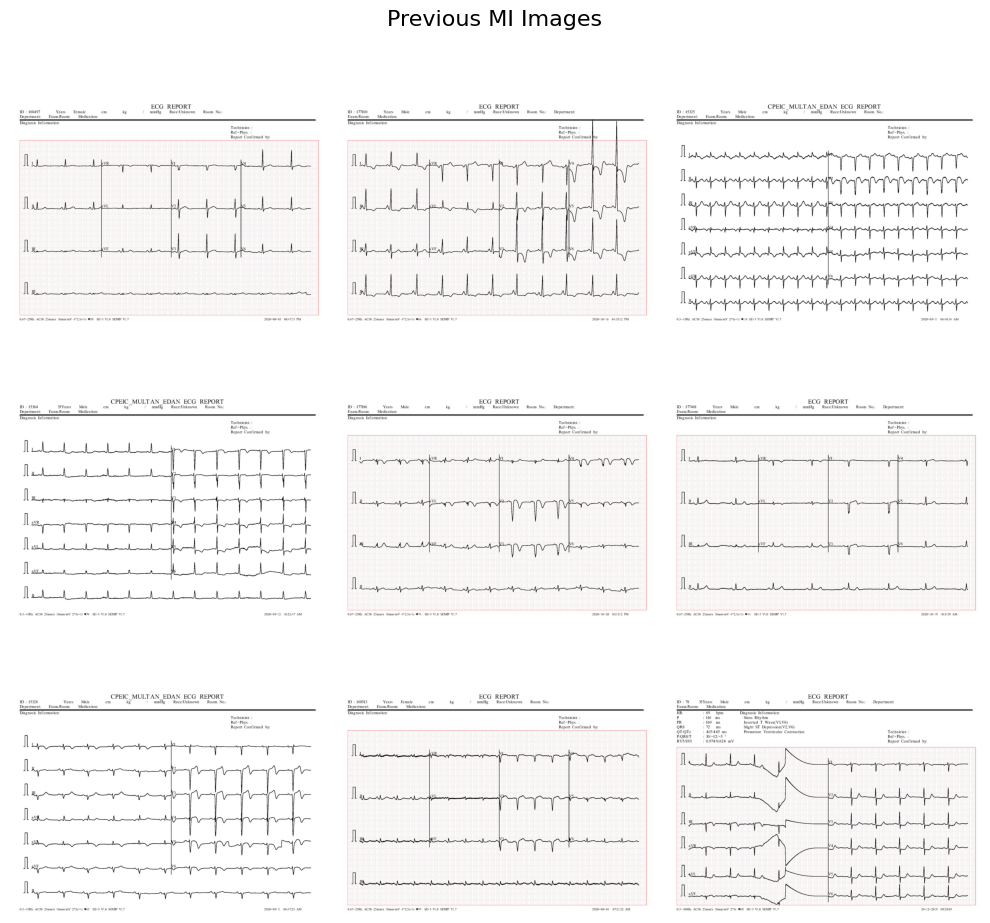

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Previous MI Images', fontsize=16)
axes = axes.ravel()

for i, image_file in enumerate(MI_History_files[:9]):
    image_path = os.path.join(MI_History_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

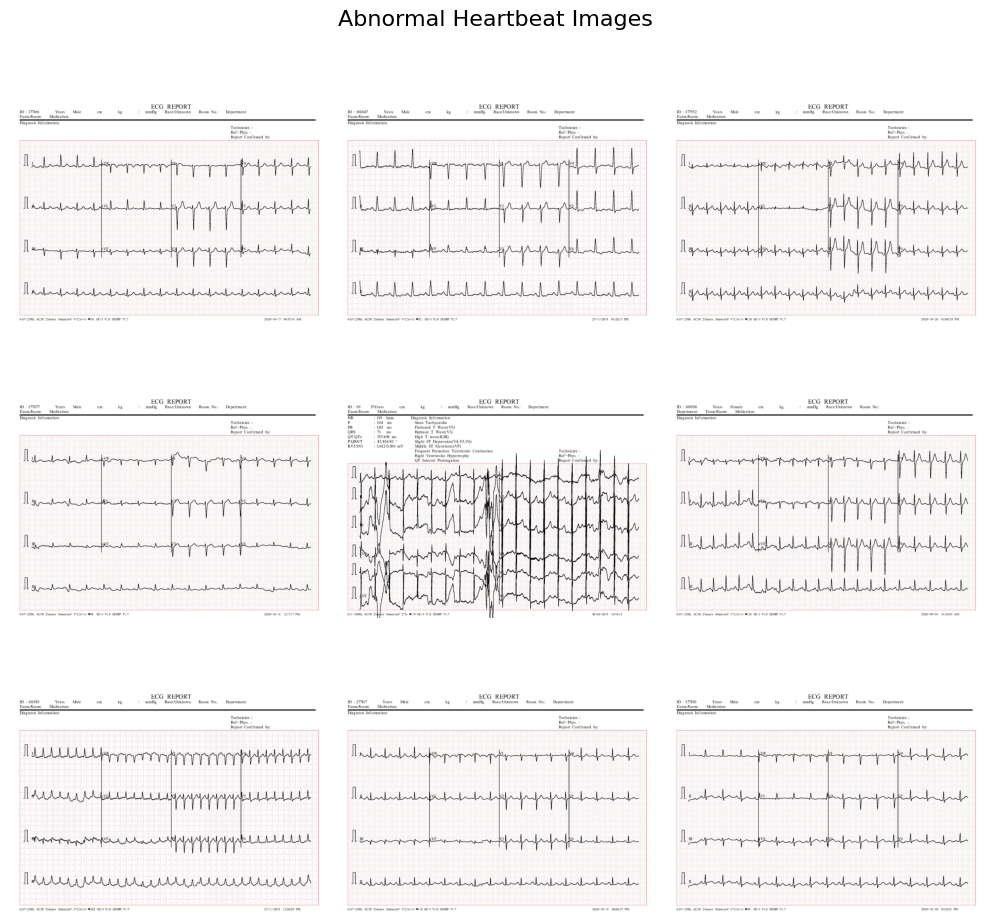

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Abnormal Heartbeat Images', fontsize=16)
axes = axes.ravel()

for i, image_file in enumerate(abnornal_files[:9]):
    image_path = os.path.join(abnormalheartbeat_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Preprocess and Load images

In [13]:
def load_and_preprocess_images(image_folder):
    image_files = os.listdir(image_folder)
    images = []
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (128, 128))
            images.append(image)
    return images

In [14]:
covid19_files = load_and_preprocess_images(COVID_19_path)
normal_files = load_and_preprocess_images(normalheartbeat_path)
mi_path_files = load_and_preprocess_images(Mycocardial_Infarctions_path)
prev_mi_files = load_and_preprocess_images(MI_History_path)
abnormal_heartbeat_files = load_and_preprocess_images(abnormalheartbeat_path)

In [15]:
covid19_files = np.array(covid19_files).reshape(-1, 128, 128, 3)
normal_files = np.array(normal_files).reshape(-1, 128, 128, 3)
mi_path_files = np.array(mi_path_files).reshape(-1, 128, 128, 3)
prev_mi_files = np.array(prev_mi_files).reshape(-1, 128, 128, 3)
abnormal_heartbeat_files  = np.array(abnormal_heartbeat_files ).reshape(-1, 128, 128, 3)

In the context of reshaping arrays in NumPy, the value -1 is used as a placeholder that allows NumPy to automatically calculate the size of that particular dimension based on the size of the original array and the specified dimensions.

For example, if you have an array with 100 elements, and you reshape it to have dimensions (-1, 10), NumPy will automatically calculate that the size of the first dimension should be 10, because 100 / 10 = 10 100/10=10.

## Combine and Reshape Data

In [16]:
all_files = np.concatenate((covid19_files, normal_files, mi_path_files, prev_mi_files, abnormal_heartbeat_files), axis=0)
all_labels = np.concatenate((
    np.zeros(len(covid19_files)),
    np.ones(len(normal_files)),
    np.ones(len(mi_path_files)) * 2,
    np.ones(len(prev_mi_files)) * 3,
    np.ones(len(abnormal_heartbeat_files)) * 4
))

The above code snippet is preparing data for a machine learning task by combining file paths from different categories into a single array called all_files and assigning corresponding labels to each file in another array called all_labels. Specifically, it concatenates file paths from five different categories: COVID-19, normal, myocardial infarction (MI), previous MI history, and abnormal heartbeat. The np.concatenate function is used to concatenate these arrays along the specified axis (axis=0, meaning along the rows). 

For labels, it assigns numeric values to each category: 0 for COVID-19, 1 for normal, 2 for MI, 3 for previous MI history, and 4 for abnormal heartbeat. These labels are then repeated for each file in the respective category arrays. This setup is commonly used in machine learning to associate input data (images, in this case) with their corresponding labels for training and evaluation purposes.

In [17]:
all_files_flat = all_files.reshape(-1, all_files.shape[1] * all_files.shape[2] * all_files.shape[3])

The above line of code reshapes the `all_files` array into a two-dimensional array (`all_files_flat`) where each row represents a single image and each column represents a flattened version of the image. The `reshape` function is used with the first dimension specified as `-1`, which indicates that NumPy should automatically determine the size of this dimension based on the total number of elements in the original array and the remaining dimensions.
 
The remaining dimensions are calculated by multiplying the width, height, and number of channels (depth) of each image in the `all_files` array. This transformation is commonly done to prepare image data for machine learning models that require a two-dimensional input format, such as fully connected neural networks or support vector machines.

## Handle Imbalance Data

In [18]:
smote = SMOTE(random_state=42)
all_files_flat_resampled, all_labels_resampled = smote.fit_resample(all_files_flat, all_labels)

unique_resampled, counts_resampled = np.unique(all_labels_resampled, return_counts=True)
class_counts_resampled = dict(zip(unique_resampled, counts_resampled))

print("New class distribution after resampling:", class_counts_resampled)

New class distribution after resampling: {0.0: 859, 1.0: 859, 2.0: 859, 3.0: 859, 4.0: 859}


SMOTE (Synthetic Minority Over-sampling Technique) is used to address the issue of class imbalance in datasets, particularly in machine learning classification tasks where one class is significantly underrepresented compared to others. In such scenarios, standard classifiers may have a bias towards the majority class, leading to poor performance on the minority class.

SMOTE works by generating synthetic samples for the minority class. It does this by interpolating new, synthetic instances along the line segments connecting similar instances in the feature space of the minority class. This technique helps to balance the class distribution by creating more representative samples of the minority class, which can improve the classifier's ability to learn the underlying patterns and make more accurate predictions for both classes.

## Data Split and Scaling

In [19]:
X_train, X_test, y_train, y_test = train_test_split(all_files_flat_resampled, all_labels_resampled, test_size=0.2, stratify=all_labels_resampled, 
                                                    random_state=42)

In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train and Evaluate Model 

### Support Vector Machine (SVM)

In [21]:
svm_classifier = SVC(random_state=42)

In [22]:
svm_classifier.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [23]:
svm_predictions = svm_classifier.predict(X_test_scaled)

In [24]:
accuracy_test = accuracy_score(y_test, svm_predictions)
print("Accuracy:", accuracy_test)

precision = precision_score(y_test, svm_predictions, average=None)
recall = recall_score(y_test, svm_predictions, average=None)
f1 = f1_score(y_test, svm_predictions, average=None)

for class_label, prec, rec, f1_score in zip(["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"], precision, recall, f1):
    print(f"Class {class_label}:")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall: {rec:.4f}")
    print(f"  F1-score: {f1_score:.4f}\n")

report = classification_report(y_test, svm_predictions)
print("Classification Report:\n", report)

confusion = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8533178114086146
Class Class 0:
  Precision: 1.0000
  Recall: 0.9767
  F1-score: 0.9882

Class Class 1:
  Precision: 0.6308
  Recall: 0.9591
  F1-score: 0.7610

Class Class 2:
  Precision: 1.0000
  Recall: 0.9012
  F1-score: 0.9480

Class Class 3:
  Precision: 0.9718
  Recall: 0.8023
  F1-score: 0.8790

Class Class 4:
  Precision: 0.8060
  Recall: 0.6279
  F1-score: 0.7059

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       172
         1.0       0.63      0.96      0.76       171
         2.0       1.00      0.90      0.95       172
         3.0       0.97      0.80      0.88       172
         4.0       0.81      0.63      0.71       172

    accuracy                           0.85       859
   macro avg       0.88      0.85      0.86       859
weighted avg       0.88      0.85      0.86       859

Confusion Matrix:
 [[168   3   0   0   1]
 [  0 164   0   0   7]
 [  0   9 155   1   7]
 [  0  23 

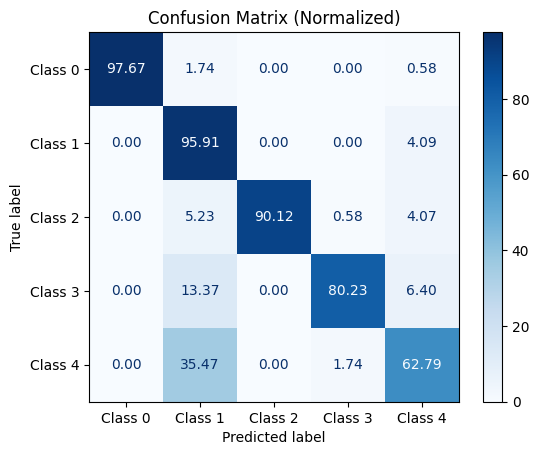

In [25]:
# Calculate confusion matrix
confusion = confusion_matrix(y_test, svm_predictions)

# Normalize confusion matrix to show percentages
confusion_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis] * 100

# Plot normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_normalized, display_labels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])
disp.plot(cmap=plt.cm.Blues, values_format='.2f')  # .2f for two decimal places
plt.title('Confusion Matrix (Normalized)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


### Random Forest

In [26]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

In [27]:
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [28]:
rf_predictions = rf_classifier.predict(X_test_scaled)

In [29]:
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", accuracy)

report = classification_report(y_test, rf_predictions)
print("Classification Report:\n", report)

confusion = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8393480791618161
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       172
         1.0       0.67      0.90      0.77       171
         2.0       0.92      0.95      0.93       172
         3.0       0.90      0.80      0.85       172
         4.0       0.77      0.58      0.66       172

    accuracy                           0.84       859
   macro avg       0.85      0.84      0.84       859
weighted avg       0.85      0.84      0.84       859

Confusion Matrix:
 [[167   4   1   0   0]
 [  0 154   0   0  17]
 [  0   6 163   0   3]
 [  0  16   8 138  10]
 [  1  50   6  16  99]]


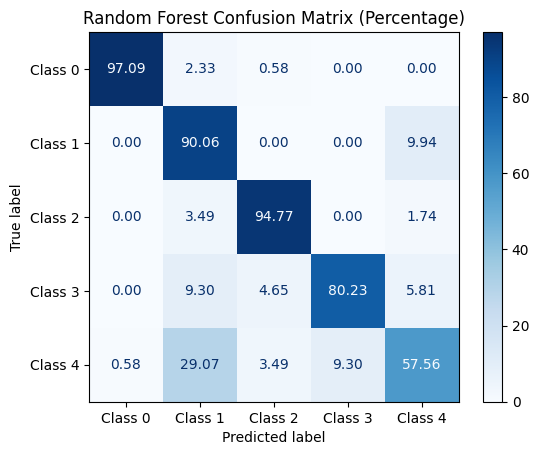

In [30]:
# Calculate confusion matrix
confusion_rf = confusion_matrix(y_test, rf_predictions)

# Calculate percentages
confusion_rf_percent = confusion_rf.astype('float') / confusion_rf.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix
disp_rf_percent = ConfusionMatrixDisplay(confusion_matrix=confusion_rf_percent, display_labels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])
disp_rf_percent.plot(cmap=plt.cm.Blues, values_format='.2f')  # .2f for two decimal places
plt.title('Random Forest Confusion Matrix (Percentage)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Decision Tree

In [31]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [32]:
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
dt_predictions = dt_classifier.predict(X_test_scaled)

In [34]:
accuracy = accuracy_score(y_test, dt_predictions)
print("Accuracy:", accuracy)

report = classification_report(y_test, dt_predictions)
print("Classification Report:\n", report)

confusion = confusion_matrix(y_test, dt_predictions)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.7881257275902211
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       172
         1.0       0.72      0.78      0.75       171
         2.0       0.87      0.82      0.84       172
         3.0       0.76      0.76      0.76       172
         4.0       0.63      0.60      0.62       172

    accuracy                           0.79       859
   macro avg       0.79      0.79      0.79       859
weighted avg       0.79      0.79      0.79       859

Confusion Matrix:
 [[168   1   1   0   2]
 [  0 133   2  10  26]
 [  0   7 141   9  15]
 [  2  16   4 131  19]
 [  3  28  15  22 104]]


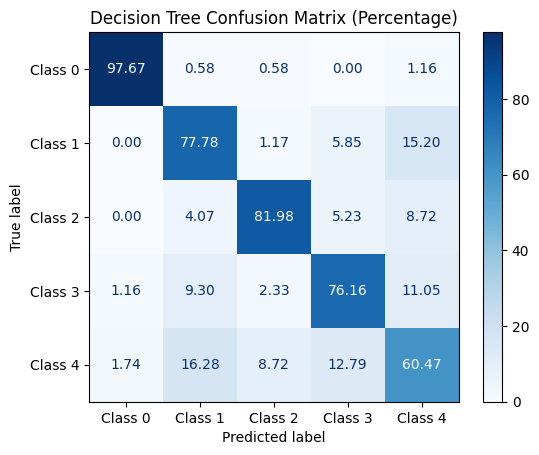

In [35]:
# Calculate confusion matrix
confusion_dt = confusion_matrix(y_test, dt_predictions)

# Calculate percentages
confusion_dt_percent = confusion_dt.astype('float') / confusion_dt.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix
disp_dt_percent = ConfusionMatrixDisplay(confusion_matrix=confusion_dt_percent, display_labels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])
disp_dt_percent.plot(cmap=plt.cm.Blues, values_format='.2f')  # .2f for two decimal places
plt.title('Decision Tree Confusion Matrix (Percentage)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [36]:
classifiers = ['Support Vector Machine', 'Random Forest', 'Decision Tree']
accuracies = [0.82, 0.92, 0.90]

fig = go.Figure(data=[go.Bar(x=classifiers, y=accuracies, marker_color=['blue', 'green', 'red'])])

fig.update_layout(
    title='Accuracy Comparison - Support Vector Machine vs. Random Forest vs. Decision Tree',
    xaxis=dict(title='Classifier'),
    yaxis=dict(title='Accuracy', range=[0, 1]),
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

## Deep Learning

### Preprocess Data for CNN


In [37]:
X_train_scaled.shape

(3436, 49152)

In [38]:
y_train.shape

(3436,)

## Define and Train CNN


In [39]:
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  
])

/Users/shreyanair/.pyenv/versions/3.10.12/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [40]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
X_train_scaled_new = X_train_scaled.reshape(-1, 128, 128, 3)

In [42]:
X_train_scaled_new.shape

(3436, 128, 128, 3)

In [43]:
history = model.fit(X_train_scaled_new, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.1979 - loss: 11.4524 - val_accuracy: 0.2020 - val_loss: 1.6097
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.1991 - loss: 1.7098 - val_accuracy: 0.2006 - val_loss: 1.6102
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.2023 - loss: 1.6092 - val_accuracy: 0.1788 - val_loss: 1.6101
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.2127 - loss: 1.7101 - val_accuracy: 0.1788 - val_loss: 1.6101
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.2172 - loss: 1.6093 - val_accuracy: 0.1788 - val_loss: 1.6102
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.2030 - loss: 1.6094 - val_accuracy: 0.1788 - val_loss: 1.6101
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.2014 - loss: 1.6094 - val_accuracy: 0.1788 - val_loss: 1.6103
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.1916 - loss: 1.6102 - val_accuracy: 0.1788 - 

In [44]:
model = Sequential()

In [45]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

/Users/shreyanair/.pyenv/versions/3.10.12/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,549,573 (24.98 MB)

 Trainable params: 6,549,573 (24.98 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(X_train_scaled_new, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 363ms/step - accuracy: 0.7242 - loss: 0.7229 - val_accuracy: 0.7660 - val_loss: 0.6087
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 359ms/step - accuracy: 0.7799 - loss: 0.6053 - val_accuracy: 0.7616 - val_loss: 0.6026
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 399ms/step - accuracy: 0.8075 - loss: 0.5202 - val_accuracy: 0.8125 - val_loss: 0.5547
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 379ms/step - accuracy: 0.8528 - loss: 0.4084 - val_accuracy: 0.8401 - val_loss: 0.4612
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 386ms/step - accuracy: 0.8723 - loss: 0.3444 - val_accuracy: 0.8648 - val_loss: 0.4126
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 393ms/step - accuracy: 0.9028 - loss: 0.2853 - val_accuracy: 0.8677 - val_loss: 0.4294
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 408ms/step - accuracy: 0.9219 - loss: 0.2315 - val_accuracy: 0.8721 - val_loss: 0.4165
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 417ms/step - accuracy: 0.9474 - loss: 0.1637 - val_accu

- The above code builds and trains two neural network models using Keras and TensorFlow for image classification with 5 classes. 
- The first model is a fully connected neural network that reshapes the input data into 128x128x3 images, then uses Dense and Dropout layers, and is compiled and trained using the Adam optimizer and sparse categorical cross-entropy loss. 
- The second model is a convolutional neural network (CNN) with multiple Conv2D and MaxPooling2D layers to extract features from the images, followed by Dense and Dropout layers for classification. 
- Both models are trained for 10 epochs with a batch size of 32 and a validation split of 20%.

In [50]:
X_test_scaled_new = X_test_scaled.reshape(-1, 128, 128, 3)

In [51]:
predictions = model.predict(X_test_scaled_new)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step


In [52]:
predicted_labels = predictions.argmax(axis=1)

In [53]:
accuracy = accuracy_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)
class_report = classification_report(y_test, predicted_labels)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.88
Confusion Matrix:
[[168   2   0   0   2]
 [  0 149   0   5  17]
 [  0   7 158   1   6]
 [  0  15   1 146  10]
 [  1  30   6   4 131]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       172
         1.0       0.73      0.87      0.80       171
         2.0       0.96      0.92      0.94       172
         3.0       0.94      0.85      0.89       172
         4.0       0.79      0.76      0.78       172

    accuracy                           0.88       859
   macro avg       0.88      0.88      0.88       859
weighted avg       0.88      0.88      0.88       859



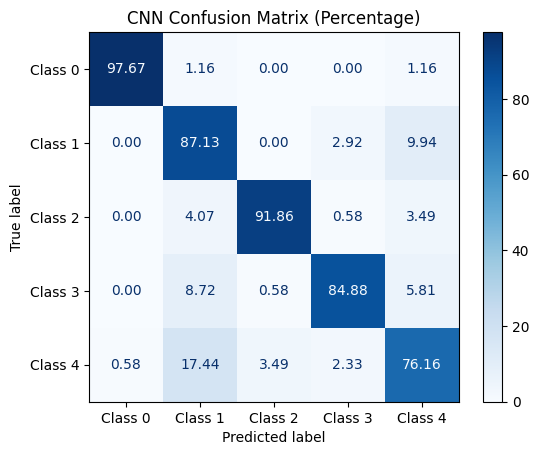

In [54]:
# Plot normalized confusion matrix for CNN
conf_matrix = confusion_matrix(y_test, predicted_labels)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp_cnn_percent = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_percent, display_labels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])
disp_cnn_percent.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('CNN Confusion Matrix (Percentage)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [55]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(1, len(history.history['accuracy']) + 1)), 
                         y=history.history['accuracy'],
                         mode='lines',
                         name='Training Accuracy'))

fig.add_trace(go.Scatter(x=list(range(1, len(history.history['val_accuracy']) + 1)), 
                         y=history.history['val_accuracy'],
                         mode='lines',
                         name='Validation Accuracy'))

fig.update_layout(title='Model Accuracy Over Epochs',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Accuracy'))

fig.show()

In [56]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(1, len(history.history['loss']) + 1)), 
                         y=history.history['loss'],
                         mode='lines',
                         name='Training Loss'))

fig.add_trace(go.Scatter(x=list(range(1, len(history.history['val_loss']) + 1)), 
                         y=history.history['val_loss'],
                         mode='lines',
                         name='Validation Loss'))

fig.update_layout(title='Model Loss Over Epochs',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Loss'))

fig.show()

## TRANSFER LEARNING

 I am leveraging a technique known as transfer learning. It's quite fascinating—I'm utilizing pre-trained deep learning models like VGG19, InceptionV3, or ResNet50, which have already learned a great deal from vast datasets like ImageNet. Then, I'm fine-tuning them for our particular task, which involves classifying images related to heart conditions. It's akin to building upon the knowledge these models already possess, so I don't have to start from square one. This approach is efficient and enables me to achieve good results even with a smaller dataset.

 I am using Kaggle since it is computationally heavy. 
 
 The accerelation I used is GPU T4 x 2 - https://www.kaggle.com/code/shry001/covid19-ecg-analysis/
 

Transfer learning involves leveraging pre-trained models that have already learned features from a large dataset, such as ImageNet, and fine-tuning them for specific tasks. This approach is crucial for several reasons:

- Efficiency: It significantly reduces the time and computational resources required for training compared to training a model from scratch.
- Performance: Pre-trained models often achieve higher accuracy as they have already learned useful features that can be adapted to new tasks.
- Data Requirement: Transfer learning is beneficial when the available dataset is relatively small, as the pre-trained model can generalize better with less data.
By using transfer learning, the project can take advantage of the robust features learned by models like VGG19, InceptionV3, and ResNet50, leading to improved performance in classifying ECG images.

In [57]:
def load_and_preprocess_images(image_folder):
    image_files = os.listdir(image_folder)
    images = []
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (224, 224))
            images.append(image)
    return images

In [58]:
abnormalheartbeat_path = os.path.join(dataset_path, 'Abnormal heart beats')
normalheartbeat_path = os.path.join(dataset_path, 'Normal')
COVID_19_path = os.path.join(dataset_path, 'COVID-19 Patients ')
Mycocardial_Infarctions_path = os.path.join(dataset_path, 'Myocardial Infarction Patients ')
MI_History_path = os.path.join(dataset_path, 'MI_History')

In [59]:
abnormal_files = load_and_preprocess_images(abnormalheartbeat_path)
normal_files = load_and_preprocess_images(normalheartbeat_path)
COVID_19_files = load_and_preprocess_images(COVID_19_path)
Mycocardial_Infarctions_files = load_and_preprocess_images(Mycocardial_Infarctions_path)
MI_History_files = load_and_preprocess_images(MI_History_path)


In [60]:
abnormal_files = np.array(abnormal_files)
normal_files = np.array(normal_files)
COVID_19_files = np.array(COVID_19_files)
Mycocardial_Infarctions_files = np.array(Mycocardial_Infarctions_files)
MI_History_files = np.array(MI_History_files)

In [61]:
# Check the shapes of the arrays
print(abnormal_files.shape)
print(normal_files.shape)
print(COVID_19_files.shape)
print(Mycocardial_Infarctions_files.shape)
print(MI_History_files.shape)

(546, 224, 224, 3)
(859, 224, 224, 3)
(250, 224, 224, 3)
(74, 224, 224, 3)
(203, 224, 224, 3)


In [62]:
# Ensure the shapes are correct for model input
assert abnormal_files.shape[1:] == (224, 224, 3)
assert normal_files.shape[1:] == (224, 224, 3)
assert COVID_19_files.shape[1:] == (224, 224, 3)
assert Mycocardial_Infarctions_files.shape[1:] == (224, 224, 3)
assert MI_History_files.shape[1:] == (224, 224, 3)

In [63]:
# Concatenate all image data and create labels
all_files = np.concatenate((abnormal_files, normal_files, COVID_19_files, Mycocardial_Infarctions_files, MI_History_files), axis=0)
all_labels = np.concatenate((
    np.zeros(len(abnormal_files)),
    np.ones(len(normal_files)),
    np.ones(len(COVID_19_files)) * 2,
    np.ones(len(Mycocardial_Infarctions_files)) * 3,
    np.ones(len(MI_History_files)) * 4
))

In [64]:
print(all_files.shape)  
print(all_labels.shape)  

(1932, 224, 224, 3)
(1932,)


In [65]:
# Normalize the images
all_files = all_files.astype('float32') / 255.0

In [66]:
# Reshape the data for RandomOverSampler
all_files_flat = all_files.reshape((all_files.shape[0], -1))

In [67]:
from imblearn.over_sampling import RandomOverSampler


In [68]:
# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
all_files_flat_resampled, all_labels_resampled = ros.fit_resample(all_files_flat, all_labels)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(all_files_flat_resampled, all_labels_resampled, test_size=0.2, stratify=all_labels_resampled, 
                                                    random_state=42)

In [70]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
X_train_scaled_new = X_train_scaled.reshape(-1, 224, 224, 3)

In [77]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [78]:

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [79]:
# Create a new model and add the base model
model = models.Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())

In [80]:
# Add fully connected layers with Dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Add the output layer with 5 units (for 5 classes) and softmax activation
model.add(Dense(5, activation='softmax'))

# Build the model by providing an input shape
model.build((None, 224, 224, 3))

# Print the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,189,253 (77.02 MB)

 Trainable params: 164,869 (644.02 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [85]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [87]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [90]:
history = model.fit(X_train_scaled_new, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 636s 7s/step - accuracy: 0.3801 - loss: 1.2950 - val_accuracy: 0.3910 - val_loss: 1.2398
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 686s 8s/step - accuracy: 0.4010 - loss: 1.2699 - val_accuracy: 0.3605 - val_loss: 1.2438
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 737s 9s/step - accuracy: 0.3663 - loss: 1.2977 - val_accuracy: 0.5000 - val_loss: 1.1448
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 724s 8s/step - accuracy: 0.4064 - loss: 1.2540 - val_accuracy: 0.5102 - val_loss: 1.1390
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 724s 8s/step - accuracy: 0.4097 - loss: 1.2526 - val_accuracy: 0.4884 - val_loss: 1.1536
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 762s 9s/step - accuracy: 0.3817 - loss: 1.2961 - val_accuracy: 0.5305 - val_loss: 1.1482
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 753s 9s/step - accuracy: 0.4203 - loss: 1.2373 - val_accuracy: 0.4549 - val_loss: 1.1847
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 633s 7s/step - accuracy: 0.4054 - loss: 1.2531 - val_accuracy: 0.3605 - v

KeyboardInterrupt: 

Due to hardware limitations, I have continued the rest of the code in kaggle. https://www.kaggle.com/code/shry001/covid19-ecg-analysis/

In [ ]:
# Predict on the test set
predictions = model.predict(X_test_scaled)
predicted_labels = predictions.argmax(axis=1)

In [ ]:
# Evaluate the results
accuracy = accuracy_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)
class_report = classification_report(y_test, predicted_labels)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predicted_labels, normalize=True)
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.applications import InceptionV3
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
for layer in base_model_inception.layers:
    layer.trainable = False

In [ ]:
model_inception = models.Sequential()
model_inception.add(base_model_inception)
model_inception.add(layers.GlobalAveragePooling2D())
model_inception.add(layers.Dense(256, activation='relu'))
model_inception.add(layers.Dropout(0.5))
model_inception.add(layers.Dense(128, activation='relu'))
model_inception.add(layers.Dropout(0.5))
model_inception.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
historyIV3 = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


In [ ]:
# Evaluate the model
predictions = model.predict(X_test_scaled)
predicted_labels = predictions.argmax(axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)
class_report = classification_report(y_test, predicted_labels)

In [ ]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predicted_labels, normalize=True)
plt.show()


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Explainable AI - SHAP

- **Explainable AI (XAI) is essential for understanding and interpreting the decisions made by complex models, especially in critical fields like healthcare. XAI helps build trust and transparency, allowing clinicians to understand why a model made a particular prediction.**

- In this project, SHAP (SHapley Additive exPlanations) was chosen over other explainability methods like LIME (Local Interpretable Model-agnostic Explanations) for several reasons:

    - Consistency and Accuracy: SHAP values provide consistent and theoretically sound explanations based on game theory, ensuring that the contributions of each feature to the prediction are accurately represented.
    - Global Interpretability: Unlike LIME, which provides local explanations for individual predictions, SHAP can aggregate explanations across multiple predictions, offering insights into the model's behavior on a global scale.
    - Compatibility: SHAP integrates well with various machine learning frameworks and models, making it a versatile tool for explaining both traditional machine learning models and complex neural networks.
    - Comprehensive Analysis: SHAP can handle interactions between features effectively, providing a more comprehensive understanding of the model's decision-making process.
    
By using SHAP, the project ensures that the model's predictions are interpretable, which is crucial for gaining the trust of medical professionals and facilitating the practical application of the model in clinical settings.

In [ ]:
import numpy as np
import tensorflow as tf
import shap

# Convert the dataset to numpy arrays
X_train_scaled_np = np.array(X_train_scaled)
X_test_scaled_np = np.array(X_test_scaled)

# Define a custom prediction function
def model_predict(X):
    return model.predict(X, batch_size=100)

# Enable eager execution
tf.config.experimental_run_functions_eagerly(True)

# Initialize the KernelExplainer with the custom prediction function and numpy background
explainer = shap.KernelExplainer(model_predict, X_train_scaled_np)

# Choose a sample from the test data to explain
explainer_sample = X_test_scaled_np[:100]
if len(explainer_sample.shape) == 1:
    explainer_sample = explainer_sample.reshape(1, -1)
elif len(explainer_sample.shape) > 2:
    explainer_sample = explainer_sample.reshape(explainer_sample.shape[0], -1)

# Calculate SHAP values for the sample
shap_values = explainer.shap_values(explainer_sample)

# Enable debug mode for tf.data functions if needed
tf.data.experimental.enable_debug_mode()

# Print SHAP values
print(shap_values)


### Key Takeaways
- CNN Performance: The CNN model performed the best with an accuracy of 0.88 and balanced performance across all metrics.
- SVM: SVM also performed well with an accuracy of 0.853, particularly excelling in precision and recall for most classes.
- Random Forest and Decision Tree: Both had respectable accuracies but were less effective than CNN and SVM, with the Random Forest at 0.839 and Decision Tree at 0.788.
- VGG19 and InceptionV3: These deep learning models had varied performance, with InceptionV3 performing better (0.81 accuracy) compared to VGG19 (0.70 accuracy).
The CNN model is the top performer, making it the most suitable for ECG image classification in this context.